In [6]:
# Libraries

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from lazypredict.Supervised import LazyClassifier
import joblib
import re
import pickle
import nltk
from nltk.corpus import stopwords
nltk.download('popular')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

- ssl (Secure Sockets Layer)
- pandas: for data manipulation and analysis.
- numpy: provides numerical operations.
- matplotlib, seaborn: for visualization.
- string: provides string manipulation utilities.
- sklearn: for machine learning:
  1. train_test_split: Splits data into training and testing sets.
  2. GridSearchCV: performs hyperparameter tuning.
  3. Standard scaler: Standardizes features by scaling them.
  4. Accuracy score: measures classification accuracy.
  5. Classification report: provides precision, recall, and F1-score.
  6. Confusion matrix: displays classification performance in matrix form.
  7. TfidfVectorizer: converts text into numerical features using TF-IDF.
  8. BernoulliNB: it is a variation of the Naive Bayes algorithm used for binary/boolean features.

- lazypredict (autoML): quickly compares multiple ML models for classification and regression.
- joblib: saves and loads machine learning models.
- re: provides support for regular expressions (regex). It allows you to search, match, and manipulate strings based on patterns.
- pickle: for saving and loading models or data.
- nltk: natural language processing toolkit.
  1. stopwords: provides common words to remove from text.
  2. nltk.download('popular'): downloads common NLP datasets and models.
- warnings: manages warnings.
  1. warnings.filterwarnings('ignore'): suppresses warning messages.

In [8]:
# Load Data

data = pd.read_csv("/content/dataset.csv")
data_copy = data.copy()

data.head(10)

,Unnamed: 0,source_text,plagiarized_text,label
0,0,Researchers have discovered a new species of b...,Scientists have found a previously unknown but...,1
1,1,The moon orbits the Earth in approximately 27....,Our natural satellite takes around 27.3 days t...,1
2,2,Water is composed of two hydrogen atoms and on...,H2O consists of 2 hydrogen atoms and 1 oxygen ...,1
3,3,The history of Rome dates back to 753 BC.,Rome has a long history that can be traced bac...,1
4,4,Pluto was once considered the ninth planet in ...,"In the past, Pluto was classified as the ninth...",1
5,5,This is a unique and original sentence.,This sentence is unique and original.,0
6,6,Artificial intelligence is reshaping industries.,AI is changing the landscape of various sectors.,0
7,7,Python is a popular programming language for d...,Data science often relies on Python as a widel...,0
8,8,The Earth revolves around the Sun in a nearly ...,Our planet follows an almost circular path as ...,0
9,9,Paris is the capital of France.,France's capital city is Paris.,0


In [9]:
# Remove unnecessary columns

data.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
data

,source_text,plagiarized_text,label
0,Researchers have discovered a new species of b...,Scientists have found a previously unknown but...,1
1,The moon orbits the Earth in approximately 27....,Our natural satellite takes around 27.3 days t...,1
2,Water is composed of two hydrogen atoms and on...,H2O consists of 2 hydrogen atoms and 1 oxygen ...,1
3,The history of Rome dates back to 753 BC.,Rome has a long history that can be traced bac...,1
4,Pluto was once considered the ninth planet in ...,"In the past, Pluto was classified as the ninth...",1
...,...,...,...
365,Playing musical instruments enhances creativity.,Creativity is enhanced by playing musical inst...,0
366,Studying history helps in understanding the pr...,Understanding the present is aided by studying...,0
367,Listening to classical music can improve focus.,Focus is improved by listening to classical mu...,0
368,Practicing yoga enhances physical flexibility.,Physical flexibility is enhanced by practicing...,0


In [10]:
data.shape

(370, 3)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source_text       370 non-null    object
 1   plagiarized_text  370 non-null    object
 2   label             370 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


label
0    187
1    183
Name: count, dtype: int64


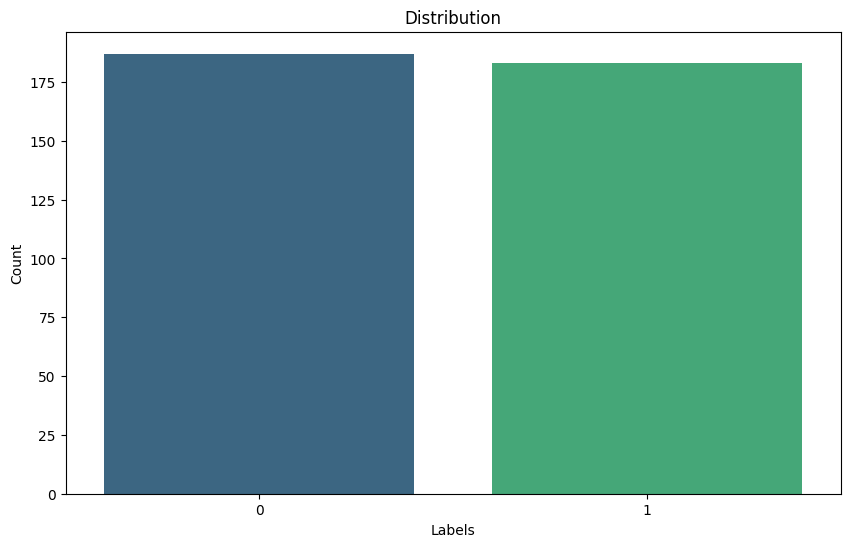

In [12]:
count = data['label'].value_counts()
print(count)

# bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = count.index, y = count.values, palette = "viridis")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution")
plt.show()

  - data['label'].value_counts(): counts the occurrences of each unique value in the 'label' column.
  - sns.barplot(): draws a bar plot with labels on the x-axis and their counts on the y-axis.
  - count.index: uses unique labels as the x-axis values.
  - count.values: uses label counts as the y-axis values.

In [ ]:
# Text cleaning or removing punctuation, numbers, stop words and so on.

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = (text.translate(str.maketrans("", "", st.punctuation))).lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = " ".join(text.split())
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    text = " ".join(word for word in text.split() if word not in stop_words)

    return text

data["source_text"] = data["source_text"].apply(preprocess_text)
data["plagiarized_text"] = data["plagiarized_text"].apply(preprocess_text)

# Data after cleaning
data

Firstly, inside of function it checks if the input is a string, else returns an empty string to prevent errors.

- str.maketrans(" ", " ", st.punctuation): removes all punctuation from the text.
- re.sub(r'\d+', '', text): removes numbers.
- stopwords.words("english"): loads common stopwords. Then removes stopwords by filtering words that are in the stopwords list.

In [13]:
# Vectorization

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data["source_text"] + " " + data["plagiarized_text"])
y = data['label']

TfidfVectorizer(): converts text into numerical features by assigning weights to words based on their importance in the document.

In [14]:
# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
# Finding the best models using lazypredict

from scipy.sparse import csr_matrix

# Convert TF-IDF to a DataFrame
x_df = pd.DataFrame(x.toarray())
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.2, random_state = 42)

lazy = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, preds = lazy.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 32/32 [00:09<00:00,  3.54it/s]

[LightGBM] [Info] Number of positive: 144, number of negative: 152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 296, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486486 -> initscore=-0.054067
[LightGBM] [Info] Start training from score -0.054067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [16]:
# Model for BernoulliNB (Naive Bayes)

bnb = BernoulliNB()
bnb.fit(x_train, y_train)

pred_bnb = bnb.predict(x_test) #predictions

Accuracy score: 0.8513513513513513
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.87      0.85      0.86        39

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



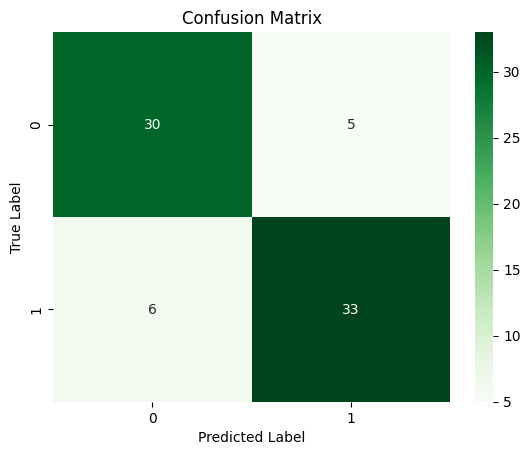

In [17]:
# Evalutaion for BernoulliNB

print(f"Accuracy score: {accuracy_score(y_test, pred_bnb)}")
print(f"Classification report: \n{classification_report(y_test, pred_bnb)}")

cm = confusion_matrix(y_test, pred_bnb)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Hyperparameter tuning for BernoulliNB

params = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'binarize': [0.0, 0.5],  # Threshold for binarizing features
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

gr = GridSearchCV(bnb, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
gr.fit(x_train, y_train)

print("Best Parameters: ", gr.best_params_)

# Best model
best_bnb = gr.best_estimator_

Best Parameters:  {'alpha': 0.5, 'binarize': 0.0, 'fit_prior': True}


Accuracy score: 0.8513513513513513
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.87      0.85      0.86        39

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



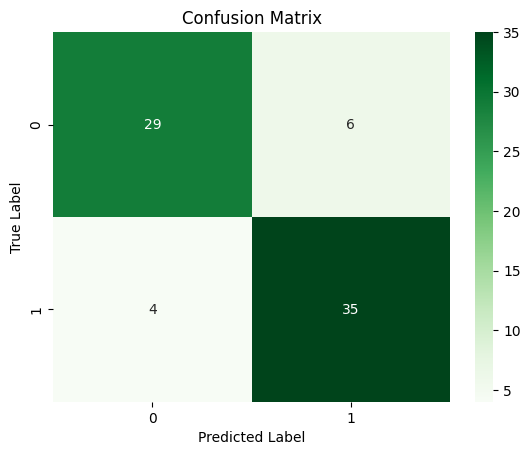

In [19]:
# Results after tuning

best_pred_bnb = best_bnb.predict(x_test)

print(f"Accuracy score: {accuracy_score(y_test, pred_bnb)}")
print(f"Classification report: \n{classification_report(y_test, pred_bnb)}")

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred_bnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Save and load model

pickle.dump(best_bnb, open("model.pkl",'wb'))
pickle.dump(tfidf, open('tfidf_vectorizer.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
tfidf = pickle.load(open('tfidf_vectorizer.pkl','rb'))

In [21]:
#Function for checking

def check_plagiarism(input):
    """
    Transforms the input text using a TF-IDF vectorizer,
    predicts whether it is plagiarized, and returns the result.
    """
    text_vector = tfidf.transform([input])
    pred = model.predict(text_vector)

    return "Plagiarism Identified" if pred[0] == 1 else "No Evidence of Plagiarism"


# Examples:
example1 = 'Artificial intelligence is reshaping industries.'
print(check_plagiarism(example1))  # Expected output: "No Evidence of Plagiarism"

example2 = 'Au is the chemical symbol for gold.'
print(check_plagiarism(example2))  # Expected output: "Plagiarism Identified"

No Evidence of Plagiarism
Plagiarism Identified


In [2]:
import gradio as gr

def check_plagiarism(input):
    text_vector = tfidf.transform([input])
    pred = model.predict(text_vector)
    return "Plagiarism Identified" if pred[0] == 1 else "No Evidence of Plagiarism"

# Create a Gradio interface
interface = gr.Interface(
    fn = check_plagiarism,
    inputs = gr.Textbox(lines = 5, placeholder = "Enter text here..."),
    outputs = "text",
    title = "Plagiarism Checker"
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8be23b9dd38ff12899.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Initially, *gradio* is a library used for building web-based applications for machine learning models.

- fn = : calls thefunction when the user submits text.
- inputs = : provides a textbox where users enter text.
- outputs = : displays the result as text.
- title = : adds a title to the interface.